# Chapter: Exploratory Data Analysis: Getting to Know Your Data Well


# Topic: Nonlinearity Assessment

In [1]:
# import required packages
import numpy as np, matplotlib.pyplot as plt
from ennemi import pairwise_corr

np.random.seed(0)
plt.rcParams.update({'font.size': 20})

In [2]:
# generate data
t = np.linspace(0.01,2,100)
x1 = np.zeros((100,1))
x2 = np.zeros((100,1))
x3 = np.zeros((100,1))

for i in range(100):
    x1[i] = t[i] + np.random.normal(scale=0.05)
    x2[i] = np.power(t[i],3) - 3*t[i] + np.random.normal(scale=0.05)
    x3[i] = -np.power(t[i],4) + 3*np.power(t[i],2) +  np.random.normal(scale=0.03)

C:\Users\f0ne44\AppData\Local\Temp/ipykernel_34384/1539468611.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


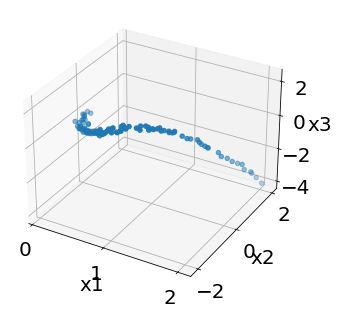

In [5]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,x3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

In [7]:
# compute linear and Nonlinear correlation coefficients
data = np.hstack((x1,x2,x3))

# pair-wise linear correlation coefficients
rho_xy = np.corrcoef(data, rowvar=False)
print('rho_xy:', rho_xy)
print('----------')

# pair-wise MI
rho_I_xy = pairwise_corr(data)
print('MI:', rho_I_xy)
print('----------')

# pair-wise nonlinear correlation coefficients
rxy = rho_I_xy*(1-np.abs(rho_xy))
print('rxy:', rxy)

rho_xy: [[ 1.          0.36802608 -0.20124181]
 [ 0.36802608  1.         -0.9388201 ]
 [-0.20124181 -0.9388201   1.        ]]
----------
MI: [[       nan 0.97264734 0.98032517]
 [0.97264734        nan 0.97571   ]
 [0.98032517 0.97571           nan]]
----------
rxy: [[       nan 0.61468775 0.78304275]
 [0.61468775        nan 0.05969384]
 [0.78304275 0.05969384        nan]]


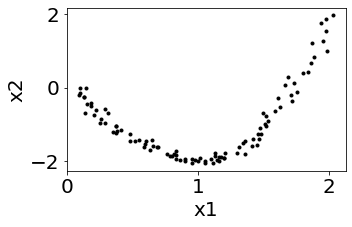

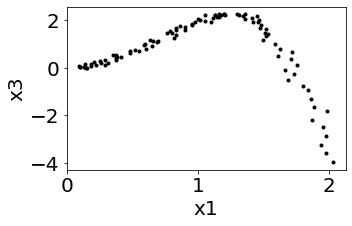

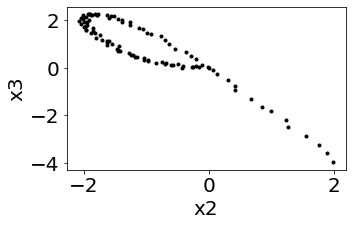

In [8]:
# pair-wise scatter plots
plt.figure(figsize=(5,3))
plt.plot(x1,x2,'.',color='black')
plt.xlabel('x1'), plt.ylabel('x2')

plt.figure(figsize=(5,3))
plt.plot(x1,x3,'.',color='black')
plt.xlabel('x1'), plt.ylabel('x3')

plt.figure(figsize=(5,3))
plt.plot(x2,x3,'.',color='black')
plt.xlabel('x2'), plt.ylabel('x3')

plt.show()